# Principal Component Analyst

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
from utils.paths import DATA_RAW_DIR

path_heart = str(DATA_RAW_DIR / "heart.csv")
print(Path(path_heart).exists())

True


### Loading Dataset

In [3]:
df_heart = pd.read_csv(path_heart, sep=",", encoding="utf-8")
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### EDA

In [4]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Check dimensions
df_heart.shape

(1025, 14)

In [6]:
# Check for duplicates
df_heart.duplicated().sum()

np.int64(723)

In [7]:
# Check for missing values
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Preprocessing

In [8]:
X = df_heart.drop(columns=["target"])
y = df_heart["target"]

print(f"X shape: {X.shape}, y shape: {y.shape}")
print(type(X), type(y))

X shape: (1025, 13), y shape: (1025,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


## Split data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Standarize - Scaler

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Check if the scaler worked
print(f"X_train_scaled shape: {X_train_scaled.shape}, X_test_scaled shape: {X_test_scaled.shape}")
print(type(X_train_scaled), type(X_test_scaled))


X_train_scaled shape: (717, 13), X_test_scaled shape: (308, 13)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### PCA

In [11]:
# pca

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Check if PCA worked
print(f"X_train_pca shape: {X_train_pca.shape}, X_test_pca shape: {X_test_pca.shape}")
print(type(X_train_pca), type(X_test_pca))

X_train_pca shape: (717, 3), X_test_pca shape: (308, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [12]:
# ipca
ipca = IncrementalPCA(n_components=3, batch_size=10)
X_train_ipca = ipca.fit_transform(X_train_scaled)
X_test_ipca = ipca.transform(X_test_scaled)
# Check if IPCA worked
print(f"X_train_ipca shape: {X_train_ipca.shape}, X_test_ipca shape: {X_test_ipca.shape}")
print(type(X_train_ipca), type(X_test_ipca))

X_train_ipca shape: (717, 3), X_test_ipca shape: (308, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


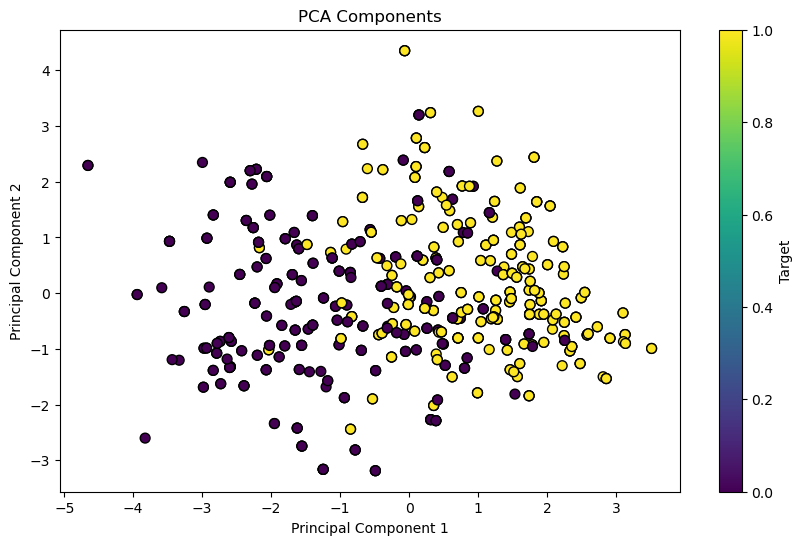

In [13]:
# plot PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.show()

🧠 Qué puedes concluir:
	•	Sí puedes usar PCA como paso previo a modelos de clasificación para acelerar entrenamiento o mejorar generalización.
	•	PCA ayudó a comprimir la información a 2D sin perder completamente la estructura de clases.
	•	Si necesitas más separación, podrías probar con:
	•	Aumentar el número de componentes.
	•	Usar otros métodos de reducción como t-SNE o UMAP (no lineales).

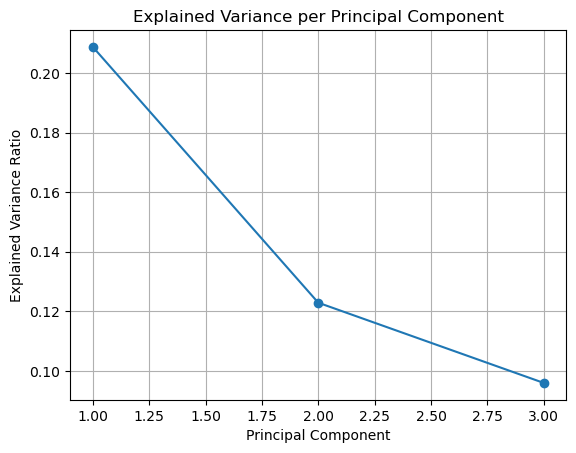

In [14]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per Principal Component')
plt.grid(True)
plt.show()

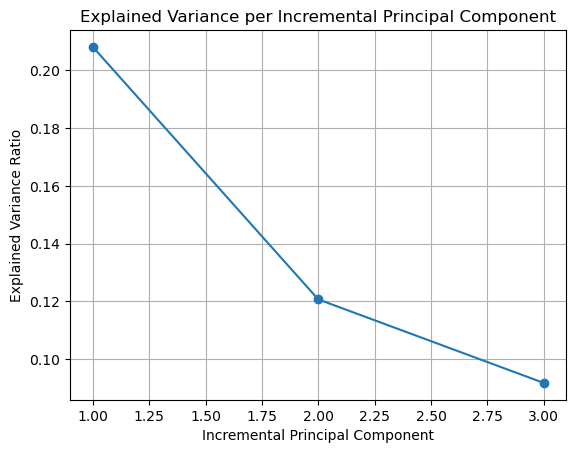

In [17]:
# IPCA

plt.plot(range(1, len(ipca.explained_variance_ratio_) + 1),
         ipca.explained_variance_ratio_, marker='o')
plt.xlabel('Incremental Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per Incremental Principal Component')
plt.grid(True)
plt.show()

### Logistic Regression Model

In [18]:
# -----------------------------
# PCA Model
# -----------------------------
model_pca = LogisticRegression(max_iter=100, random_state=42)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)



In [19]:
# -----------------------------
# IPCA Model
# -----------------------------
model_ipca = LogisticRegression(max_iter=100, random_state=42)
model_ipca.fit(X_train_ipca, y_train)
y_pred_ipca = model_ipca.predict(X_test_ipca)

## Evaluation

In [25]:
# -----------------------------
# PCA Model Evaluation
# -----------------------------

print("📊 Results with PCA:")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca))
print("Classification Report:\n", classification_report(y_test, y_pred_pca))

📊 Results with PCA:
Accuracy: 0.7857142857142857
Confusion Matrix:
 [[119  40]
 [ 26 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       159
           1       0.75      0.83      0.79       149

    accuracy                           0.79       308
   macro avg       0.79      0.79      0.79       308
weighted avg       0.79      0.79      0.79       308



In [26]:
# -----------------------------
# IPCA model evaluation
# -----------------------------

print("📊 Results with Incremental PCA:")
print("Accuracy:", accuracy_score(y_test, y_pred_ipca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ipca))
print("Classification Report:\n", classification_report(y_test, y_pred_ipca))

📊 Results with Incremental PCA:
Accuracy: 0.801948051948052
Confusion Matrix:
 [[123  36]
 [ 25 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       159
           1       0.78      0.83      0.80       149

    accuracy                           0.80       308
   macro avg       0.80      0.80      0.80       308
weighted avg       0.80      0.80      0.80       308

